<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Session%204/Third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishad Rajmalwar, Batch F6, nrajmalwar@gmail.com

###Planning and Expectations###

1.   Our aim is to reach 99.4% accuracy in this model.
2. We use BatchNormalization after every Convolution layer except before the prediction layer.
3. We add Dropout after every Convolution layer except before the prediction layer. We start with a value of 0.1 for each layer and try tuning it at different points like at the beginning, at the end, near the transition block. We can remove the dropouts at some layers.
4. If we do not reach the target accuracy at the end of 10 epochs, we further run the models for 20 more epochs.

# **Import Libraries and modules**

Install and import keras library

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Important important APIs, functions and libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, SeparableConv2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

### Load pre-shuffled MNIST data into train and test sets

Load and split the data into training and test set

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Print the shape of X_train (examples of the dataset) and plot the first image

(60000, 28, 28)


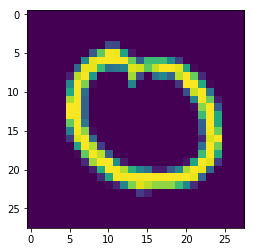

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[108])

Reshape the X_train and X_test to (m,  28, 28, 1) tensor

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Change the values of X_train, X_test to float32 and normalize them between 0 and 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Print the first 10 elements of y_train which contains the class labels for X_train

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert the values of Y_train and Y_test to one-hot vectors

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Model Building

Build a simple convolution model

In [10]:
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # Output size = 26; Receptive Field = 3
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24; 5
model.add(BatchNormalization())

model.add(Convolution2D(20, 3, 3, activation='relu')) # 22; 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11; 14

model.add(Convolution2D(10, 1, 1, activation='relu')) # 11; 16
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9; 18
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 7; 20
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(20, 3, 3, activation='relu')) # 5; 22
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if __name__ == '__main__':


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`


Print the model summary

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        2900      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 20)        80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 20)        0         
__________

Compile the model with the loss function, the optimizer and the metrics used

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Model Training

Fit the model on X_train and Y_train for 10 epochs with a batch size of 32

In [13]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 660us/step - loss: 0.2261 - acc: 0.9286 - val_loss: 0.0576 - val_acc: 0.9821
Epoch 2/10
60000/60000 [==============================] - 34s 562us/step - loss: 0.0632 - acc: 0.9804 - val_loss: 0.0525 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.0503 - acc: 0.9845 - val_loss: 0.0360 - val_acc: 0.9897
Epoch 4/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.0429 - acc: 0.9867 - val_loss: 0.0340 - val_acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 23s 378us/step - loss: 0.0393 - acc: 0.9874 - val_loss: 0.0310 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0385 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 22s 373us/

In [14]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=20, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.0247 - acc: 0.9921 - val_loss: 0.0283 - val_acc: 0.9909
Epoch 2/20
60000/60000 [==============================] - 21s 350us/step - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0385 - val_acc: 0.9890
Epoch 3/20
60000/60000 [==============================] - 21s 349us/step - loss: 0.0233 - acc: 0.9925 - val_loss: 0.0330 - val_acc: 0.9904
Epoch 4/20
60000/60000 [==============================] - 22s 362us/step - loss: 0.0232 - acc: 0.9924 - val_loss: 0.0271 - val_acc: 0.9923
Epoch 5/20
60000/60000 [==============================] - 21s 358us/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0341 - val_acc: 0.9902
Epoch 6/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0256 - val_acc: 0.9922
Epoch 7/20
60000/60000 [==============================] - 22s 361us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.

#Model Evaluation

Evaluate the model on the test set

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the evaluation score of the model

In [16]:
print(score)

[0.024972769811426588, 0.9924]


#Model Prediction

Use the model to predict the class labels of test set

In [0]:
y_pred = model.predict(X_test)

Compare the predicted values and the actual values

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[6.2232977e-16 2.6661811e-13 7.5689233e-09 2.5883753e-12 4.8106020e-14
  6.0381783e-17 1.7185497e-23 1.0000000e+00 2.5726607e-11 5.9128441e-10]
 [7.8543302e-08 1.4539577e-05 9.9997663e-01 1.0291472e-10 4.3583506e-10
  2.2579442e-11 8.6744876e-06 2.1691844e-10 2.6809289e-08 7.7343692e-13]
 [1.0192123e-11 9.9999845e-01 1.3946354e-10 2.3677033e-10 4.3902574e-07
  2.1988317e-11 5.9025982e-08 1.8211685e-07 8.0116365e-07 9.2500493e-11]
 [9.9999905e-01 1.2587765e-14 5.5954172e-07 1.2041443e-11 2.1952195e-12
  1.5956056e-08 1.7128518e-07 1.3307948e-09 1.1861058e-07 8.2991880e-09]
 [5.3896512e-11 4.8032463e-11 2.4303998e-11 3.8238855e-14 9.9999988e-01
  3.0930689e-11 6.1766176e-10 7.2085811e-13 1.1600087e-12 7.2192904e-08]
 [7.1949434e-12 9.9999785e-01 1.6498993e-09 4.7505719e-12 1.5391534e-07
  4.1914755e-13 5.4818976e-09 1.7312684e-06 2.2692869e-07 1.0520048e-10]
 [9.3874192e-13 1.2110710e-10 2.1701310e-10 5.0948178e-12 9.9967670e-01
  2.2830700e-10 1.0646673e-20 1.2220687e-04 1.6046662e-09 

###Results###
1. We expected our model to reach an accuracy of 99.4%, and we could reach 99.41% (at the 25th epoch in the second training block). We expect to improve the accuracy and the training time by the next model.
2. We first added dropout of 0.1 after each layer, however we could reach a maximum of 99.35% accuracy only. We tried changing the values of dropouts to 0.2 after the convolution layer of 20 channels, but with no further improvements. We kept the dropout at only 2 layers and changed the value to 0.25. This gave us better results as the accuracy reached 99.41%.
3. Increasing the no. of epochs was necessary as the model now trains slowly than before.